##  Amazon Fine Food Reviews Analysis :

Data Source: https://www.kaggle.com/snap/amazon-fine-food-reviews

The Amazon Fine Food Reviews dataset consists of reviews of fine foods from Amazon.

Number of reviews: 568,454
Number of users: 256,059
Number of products: 74,258
Timespan: Oct 1999 - Oct 2012
Number of Attributes/Columns in data: 10

Attribute Information:

1.Id
2.ProductId - unique identifier for the product
3.UserId - unqiue identifier for the user
4.ProfileName
5.HelpfulnessNumerator - number of users who found the review helpful
6.HelpfulnessDenominator - number of users who indicated whether they found the review helpful or not
7.Score - rating between 1 and 5
8.Time - timestamp for the review
9.Summary - brief summary of the review
10.Text - text of the review

Objective:
Given a review, determine whether the review is positive (Rating of 4 or 5) or negative (rating of 1 or 2).

In [3]:
# import pandas
import pandas as pd
%matplotlib inline

In [4]:
# Loading the dataset to pandas dataframe df
df = pd.read_csv("Reviews.csv")

# excluding the datapoints whose Score is 3
df = df[df.Score !=3]

In [5]:
df.shape

(525814, 10)

In [6]:
# Dropping the duplicates and checking the shape of dataset
df.drop_duplicates(subset=['ProductId','UserId','ProfileName','HelpfulnessNumerator','HelpfulnessDenominator','Time','Score','Summary','Text']).shape

(525559, 10)

In [7]:
# Checking for Null and NAN's in dataset
df.isnull().sum()

Id                         0
ProductId                  0
UserId                     0
ProfileName               16
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   25
Text                       0
dtype: int64

In [8]:
# Dropping all the datapoints having Null and NAN's
df = df.dropna(how='any')

In [9]:
# Checking whether the Null and NAN's have dropped
df.isnull().sum()

Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
dtype: int64

In [10]:
# Assigning review 0 for datapoints with Score 1,2
# Assigning review 1 for datapoints with Score 4,5
df['review'] = df['Score'].apply(lambda x: 1 if x > 3 else 0)

In [11]:
# imports
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

## Observation : 5 Star reviews constitute a larger proporion followed by 4 star reviews followed by 1 star then 2 star

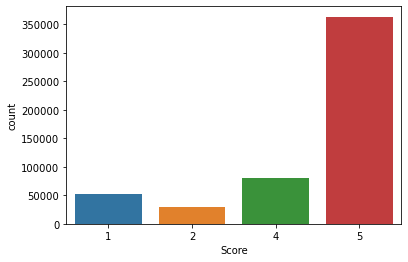

In [12]:
sns.countplot(x='Score',data=df)
plt.show()

## Observation : Positive reviews are very common

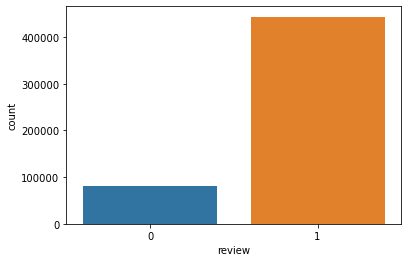

In [13]:
sns.countplot(x='review',data=df)
plt.show()

In [14]:
df1 = df
df1['Slength'] = df1.Summary.apply(len)
df1['Tlength'] = df1.Text.apply(len)

## Observation : Positive reviews are shorter

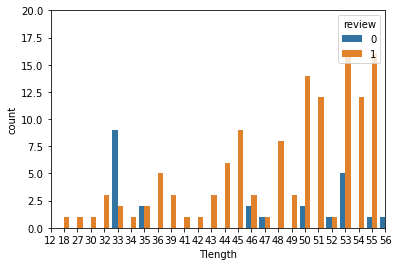

In [15]:
sns.countplot(x='Tlength',data=df1,hue='review')
plt.xlim(0,25)
plt.ylim(0,20)
plt.show()

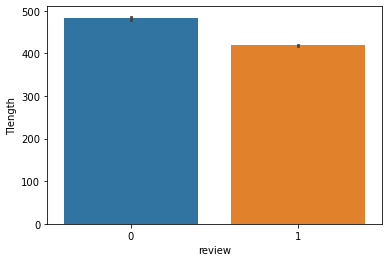

In [16]:
sns.barplot(x='review',y='Tlength',data=df)
plt.show()

In [17]:
df1.sort_values('HelpfulnessNumerator',ascending=False,inplace=True)

## Observation : Tlength is kind of log normally distributed

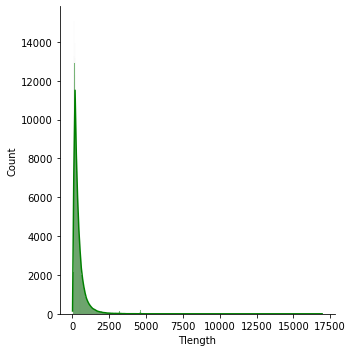

In [18]:
sns.displot(df1['Tlength'],kde=True,color='g')
plt.show()

## Observation : Positive reviews are more helpful despite being common and short

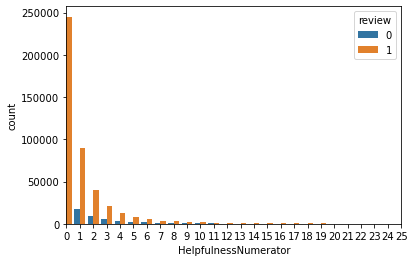

In [19]:
sns.countplot(x='HelpfulnessNumerator',data=df1,hue='review')
plt.xlim(0,25)
plt.show()

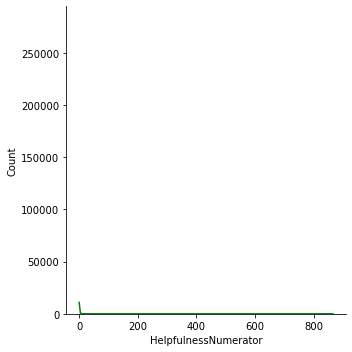

In [20]:
sns.displot(df1['HelpfulnessNumerator'],kde=True,color='g')
plt.show()

In [21]:
meanLength = df1['Tlength'].mean()
meanLength

429.42163062766633

In [22]:
df1['MeanLen'] = df1['Tlength'].apply(lambda x: 1 if x > meanLength else 0)

# Observations : 
##### 1. Longer Reviews are more helpful
##### 2.Reviews in Blue(0) are reviews with lenth less than mean length(inclusive).
##### 3.Reviews in Green(1) are reviews with lenth greater than mean length.

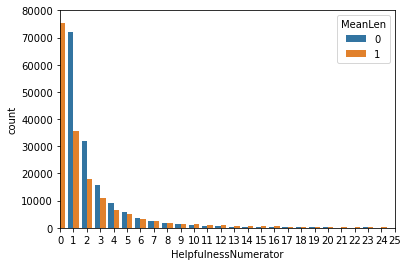

In [23]:
sns.countplot(x='HelpfulnessNumerator',data=df1,hue='MeanLen')
plt.xlim(0,25)
plt.ylim(0,80000)
plt.show()

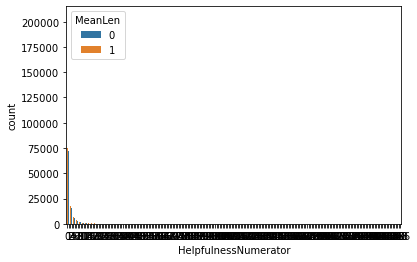

In [24]:
sns.countplot(x='HelpfulnessNumerator',data=df1,hue='MeanLen')
#sns.plt.xlim(0,25)
#sns.plt.ylim(0,80000)
plt.show()

# Bag of Words (Bow)

In [25]:
# Taking the Summary and Review to X and Y respectively
X = df['Summary']
Y = df['review']

In [26]:
print(X.shape)
print(Y.shape)

(525773,)
(525773,)


In [27]:
X.head()

190733                 Works as Advertised - Classy Product
566779                                sauce not for mortals
235722                           Lost in Translation: Truth
467800    Works great! But how does it compare to Solofi...
385450    Works great! But how does it compare to Solofi...
Name: Summary, dtype: object

In [28]:
# split X and y into training and testing sets
# by default, it splits 75% training and 25% test
# random_state=1 for reproducibility
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(394329,)
(131444,)
(394329,)
(131444,)


In [29]:
# Converting train and test sets of X and Y to lists
x_train = X_train.values.tolist()
Y_train = y_train.values.tolist()
x_test = X_test.values.tolist()
Y_test = y_test.values.tolist()

In [30]:
# imports
from nltk import word_tokenize          
from nltk.stem.porter import PorterStemmer
import string

In [31]:
stemmer = PorterStemmer()
# defining a stem function to stem the token
def stem_tokens(tokens, stemmer):
    stemmed = []
    for item in tokens:
        stemmed.append(stemmer.stem(item))
    return stemmed
# defining a tokenize function to tokenize the text remove punctuation and call stem_tokens
# this tokenize function shall be integrated in CountVectorizer
def tokenize(text):
    text = "".join([ch for ch in text if ch not in string.punctuation])
    tokens = word_tokenize(text)
    stems = stem_tokens(tokens, stemmer)
    return stems

In [32]:
from sklearn.feature_extraction.text import CountVectorizer
# Initialize the vectorizer
vectorizer = CountVectorizer()

# Use the fit_transform method to vectorize the text data
X = vectorizer.fit_transform(x_train)

# The vocabulary is now stored in the vectorizer's vocabulary_ attribute
vocab = vectorizer.vocabulary_

In [33]:
vectorizer.get_feature_names_out()

array(['00', '000', '0000', ..., 'zzzzzzzzz', 'zzzzzzzzzzz', 'åwesome'],
      dtype=object)

In [34]:
# transform train data
X_train_bog = vectorizer.transform(x_train)

In [35]:
X_train_bog

<394329x28423 sparse matrix of type '<class 'numpy.int64'>'
	with 1525500 stored elements in Compressed Sparse Row format>

In [36]:
# transform test data to bog
X_test_bog = vectorizer.transform(x_test)
X_test_bog

<131444x28423 sparse matrix of type '<class 'numpy.int64'>'
	with 503187 stored elements in Compressed Sparse Row format>

## Function to plot the confusion matrix

In [37]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
plt.rcParams["font.family"] = 'DejaVu Sans'

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## Generic function to run any model specified

In [45]:
from datetime import datetime
def perform_model(model, X_train, y_train, X_test, y_test, class_labels, cm_normalize=True, \
                 print_cm=True, cm_cmap=plt.cm.Blues):
    
    
    # to store results at various phases
    results = dict()
    
    # time at which model starts training 
    train_start_time = datetime.now()
    print('training the model..')
    model.fit(X_train, y_train)
    print('Done \n \n')
    train_end_time = datetime.now()
    results['training_time'] =  train_end_time - train_start_time
    print('training_time(HH:MM:SS.ms) - {}\n\n'.format(results['training_time']))
    
    
    # predict test data
    print('Predicting test data')
    test_start_time = datetime.now()
    y_pred = model.predict(X_test)
    test_end_time = datetime.now()
    print('Done \n \n')
    results['testing_time'] = test_end_time - test_start_time
    print('testing time(HH:MM:SS:ms) - {}\n\n'.format(results['testing_time']))
    results['predicted'] = y_pred
   

    # calculate overall accuracty of the model
    accuracy = metrics.accuracy_score(y_true=y_test, y_pred=y_pred)
    # store accuracy in results
    results['accuracy'] = accuracy
    print('---------------------')
    print('|      Accuracy      |')
    print('---------------------')
    print('\n    {}\n\n'.format(accuracy))
    
    
    # confusion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)
    results['confusion_matrix'] = cm
    if print_cm: 
        print('--------------------')
        print('| Confusion Matrix |')
        print('--------------------')
        print('\n {}'.format(cm))
        
    # plot confusin matrix
    plt.figure(figsize=(8,8))
    plt.grid(b=False)
    plot_confusion_matrix(cm, classes=class_labels, normalize=True, title='Normalized confusion matrix', cmap = cm_cmap)
    plt.show()
    
    # get classification report
    print('-------------------------')
    print('| Classifiction Report |')
    print('-------------------------')
    classification_report = metrics.classification_report(y_test, y_pred)
    # store report in results
    results['classification_report'] = classification_report
    print(classification_report)
    
    # add the trained  model to the results
    results['model'] = model
    
    return results

## Methods to print the gridsearch Attributes

In [39]:
def print_grid_search_attributes(model):
    # Estimator that gave highest score among all the estimators formed in GridSearch
    print('--------------------------')
    print('|      Best Estimator     |')
    print('--------------------------')
    print('\n\t{}\n'.format(model.best_estimator_))


    # parameters that gave best results while performing grid search
    print('--------------------------')
    print('|     Best parameters     |')
    print('--------------------------')
    print('\tParameters of best estimator : \n\n\t{}\n'.format(model.best_params_))


    #  number of cross validation splits
    print('---------------------------------')
    print('|   No of CrossValidation sets   |')
    print('--------------------------------')
    print('\n\tTotal numbre of cross validation sets: {}\n'.format(model.n_splits_))


    # Average cross validated score of the best estimator, from the Grid Search 
    print('--------------------------')
    print('|        Best Score       |')
    print('--------------------------')
    print('\n\tAverage Cross Validate scores of best estimator : \n\n\t{}\n'.format(model.best_score_))


## Logistic Regression Model

In [59]:
from sklearn import linear_model

<IPython.core.display.Javascript object>

training the model..
Fitting 3 folds for each of 12 candidates, totalling 36 fits


C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
18 fits failed out of a total of 36.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
18 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueErro

Done 
 

training_time(HH:MM:SS.ms) - 0:00:12.653378


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.004000




C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<IPython.core.display.Javascript object>

---------------------
|      Accuracy      |
---------------------

    0.9271628982684641




<IPython.core.display.Javascript object>

--------------------
| Confusion Matrix |
--------------------

 [[ 14066   6463]
 [  3111 107804]]


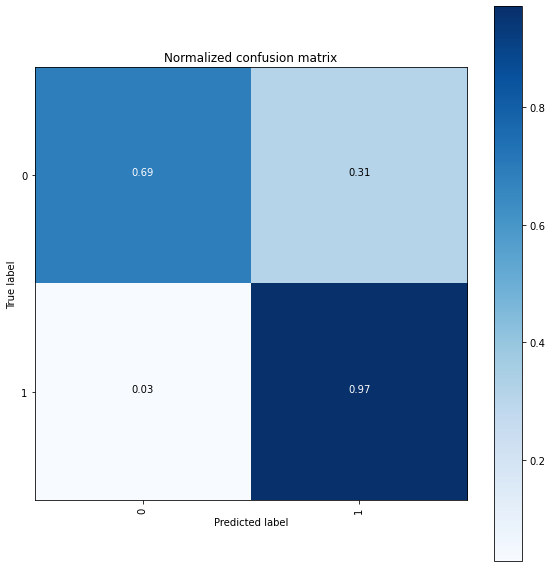

-------------------------
| Classifiction Report |
-------------------------


<IPython.core.display.Javascript object>

              precision    recall  f1-score   support

           0       0.82      0.69      0.75     20529
           1       0.94      0.97      0.96    110915

    accuracy                           0.93    131444
   macro avg       0.88      0.83      0.85    131444
weighted avg       0.92      0.93      0.92    131444



In [61]:
# start Grid search
parameters = {'C':[0.01, 0.1, 1, 10, 20, 30], 'penalty':['l2','l1']}
logr = linear_model.LogisticRegression()
log_reg_grid = GridSearchCV(logr, param_grid=parameters, cv=3, verbose=1, n_jobs=-1)
log_reg_grid_results =  perform_model(log_reg_grid,X_train_bog, Y_train, X_test_bog, Y_test, class_labels=labels)

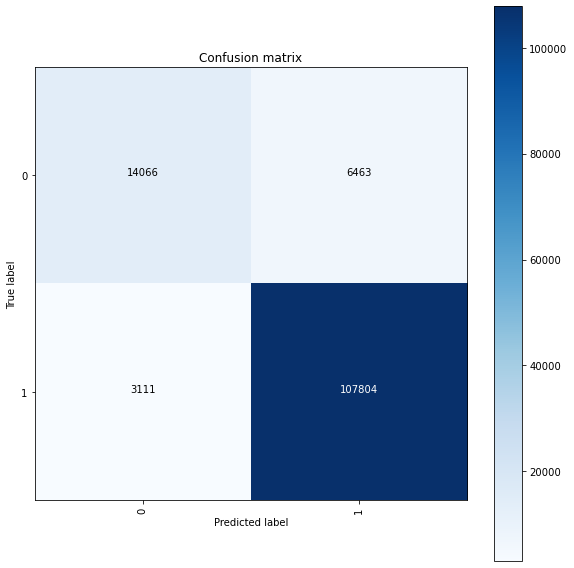

In [62]:
plt.figure(figsize=(8,8))
plt.grid(b=False)
plot_confusion_matrix(log_reg_grid_results['confusion_matrix'], classes=labels, cmap=plt.cm.Blues, )
plt.show()

In [63]:
# observe the attributes of the model 
print_grid_search_attributes(log_reg_grid_results['model'])

--------------------------
|      Best Estimator     |
--------------------------

	LogisticRegression(C=10)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'C': 10, 'penalty': 'l2'}

---------------------------------
|   No of CrossValidation sets   |
--------------------------------

	Total numbre of cross validation sets: 3

--------------------------
|        Best Score       |
--------------------------

	Average Cross Validate scores of best estimator : 

	0.9257422101848963



## Linear SVM Model

In [64]:
from sklearn.svm import LinearSVC

<IPython.core.display.Javascript object>

training the model..
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Done 
 

training_time(HH:MM:SS.ms) - 0:04:21.015123


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00




<IPython.core.display.Javascript object>

---------------------
|      Accuracy      |
---------------------

    0.928296460850248




<IPython.core.display.Javascript object>

--------------------
| Confusion Matrix |
--------------------

 [[ 14083   6446]
 [  2979 107936]]


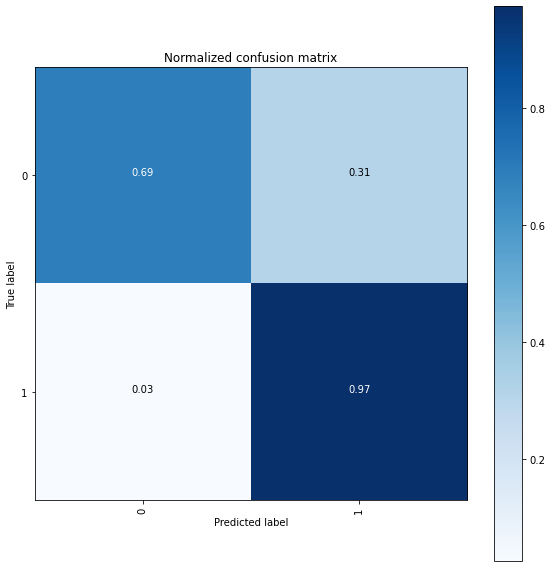

-------------------------
| Classifiction Report |
-------------------------


<IPython.core.display.Javascript object>

              precision    recall  f1-score   support

           0       0.83      0.69      0.75     20529
           1       0.94      0.97      0.96    110915

    accuracy                           0.93    131444
   macro avg       0.88      0.83      0.85    131444
weighted avg       0.93      0.93      0.93    131444



In [65]:
parameters = {'C':[0.125, 0.5, 1, 2, 8, 16]}
lr_svc = LinearSVC(tol=0.00005)
lr_svc_grid = GridSearchCV(lr_svc, param_grid=parameters, n_jobs=-1, verbose=1)
lr_svc_grid_results = perform_model(lr_svc_grid, X_train_bog, Y_train, X_test_bog, Y_test, class_labels=labels)

In [66]:
print_grid_search_attributes(lr_svc_grid_results['model'])

--------------------------
|      Best Estimator     |
--------------------------

	LinearSVC(C=0.5, tol=5e-05)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'C': 0.5}

---------------------------------
|   No of CrossValidation sets   |
--------------------------------

	Total numbre of cross validation sets: 5

--------------------------
|        Best Score       |
--------------------------

	Average Cross Validate scores of best estimator : 

	0.9279510299154948



## SVM with rbf kernel

In [67]:
df.shape

(525773, 14)

* SVM with rbf kernel is computationally very expensive as the dataset is very large

* We can randomly sample the dataset to 5% of the original and train SVM with rbf kernel

In [68]:
df1 = df.sample(frac=0.05)

In [69]:
len(df1)

26289

In [70]:
X1 = df1['Summary']
Y1 = df1['review']

In [71]:
print(X1.shape)
print(Y1.shape)

(26289,)
(26289,)


In [72]:
X1.head()

70240                                         Great Flavor
154704                      Tastes great and it's healthy!
191672    Delicious, like all-natural, sugar-free Kool-Aid
310947             For those concerned about bitterness...
496518                   Great snack, like eating a treat!
Name: Summary, dtype: object

In [73]:
# split X and y into training and testing sets
# by default, it splits 75% training and 25% test
# random_state=1 for reproducibility
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, Y1, random_state=1)

In [74]:
print(X1_train.shape)
print(X1_test.shape)
print(y1_train.shape)
print(y1_test.shape)

(19716,)
(6573,)
(19716,)
(6573,)


In [75]:
x1_train = X1_train.values.tolist()
Y1_train = y1_train.values.tolist()
x1_test = X1_test.values.tolist()
Y1_test = y1_test.values.tolist()

In [76]:
# learn the 'vocabulary' of the training data
vect.fit(x1_train)

NameError: name 'vect' is not defined

In [77]:
from sklearn.feature_extraction.text import CountVectorizer
# Initialize the vectorizer
vectorizer = CountVectorizer()

# Use the fit_transform method to vectorize the text data
X = vectorizer.fit_transform(x1_train)

# The vocabulary is now stored in the vectorizer's vocabulary_ attribute
vocab = vectorizer.vocabulary_

In [78]:
vectorizer.get_feature_names_out()

array(['00', '02', '06', ..., 'zotz', 'zuke', 'zukes'], dtype=object)

In [80]:
# transform train data
X1_train_bog = vectorizer.transform(x1_train)

In [81]:
X1_train_bog

<19716x7163 sparse matrix of type '<class 'numpy.int64'>'
	with 76065 stored elements in Compressed Sparse Row format>

In [82]:
# transform test data to bog
X1_test_bog = vectorizer.transform(x1_test)
X1_test_bog

<6573x7163 sparse matrix of type '<class 'numpy.int64'>'
	with 24557 stored elements in Compressed Sparse Row format>

In [83]:
# allocating the cache_size of 1600 MB to increase the computation speed by increasing the cache
# Note that cache_size greater than 2000 MB decreases the speed and doesn't allocated RAM to cache(sklearn bug) 

<IPython.core.display.Javascript object>

training the model..
Done 
 

training_time(HH:MM:SS.ms) - 0:10:32.858024


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:01.784337




<IPython.core.display.Javascript object>

---------------------
|      Accuracy      |
---------------------

    0.919823520462498




<IPython.core.display.Javascript object>

--------------------
| Confusion Matrix |
--------------------

 [[ 661  356]
 [ 171 5385]]


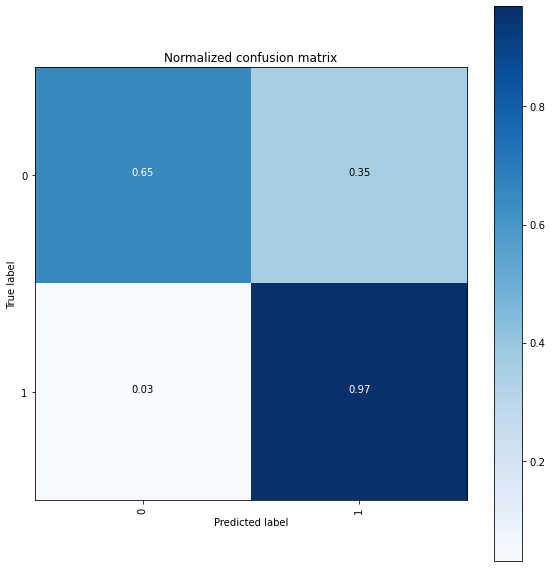

-------------------------
| Classifiction Report |
-------------------------


<IPython.core.display.Javascript object>

              precision    recall  f1-score   support

           0       0.79      0.65      0.71      1017
           1       0.94      0.97      0.95      5556

    accuracy                           0.92      6573
   macro avg       0.87      0.81      0.83      6573
weighted avg       0.92      0.92      0.92      6573



In [84]:
from sklearn.svm import SVC
parameters = {'C':[2,4,8,16],\
              'gamma': [ 0.0078125, 0.125,0.25, 2]}
rbf_svm = SVC(kernel='rbf',cache_size = 1600,probability = True)
rbf_svm_grid = GridSearchCV(rbf_svm,param_grid=parameters, n_jobs=-1)
rbf_svm_grid_results = perform_model(rbf_svm_grid, X1_train_bog, Y1_train, X1_test_bog, Y1_test, class_labels=labels)

In [85]:
print_grid_search_attributes(rbf_svm_grid_results['model'])

--------------------------
|      Best Estimator     |
--------------------------

	SVC(C=8, cache_size=1600, gamma=0.125, probability=True)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'C': 8, 'gamma': 0.125}

---------------------------------
|   No of CrossValidation sets   |
--------------------------------

	Total numbre of cross validation sets: 5

--------------------------
|        Best Score       |
--------------------------

	Average Cross Validate scores of best estimator : 

	0.917782662576605



In [86]:
# allocating the cache_size of 1600 MB to increase the computation speed by increasing the cache
# Note that cache_size greater than 2000 MB decreases the speed and doesn't allocated RAM to cache(sklearn bug) 
svr = SVC(kernel = 'rbf',cache_size = 1600,probability = True)

* SVM with rbf kernel sampling the dataframe to 5% of the original data 10 times. Cummulatively we're sampling 50% of the data randomly.